In [1]:
from __future__ import print_function

#Probability and Statistics in Python

##Calculating Probabilities

###1: The dataset

In this mission, we'll be looking at US income data. Each row is a single county in the US. For each county, we have the following columns:
- id -- the county id.
- county -- the name and state of the county.
- pop_over_25 -- the number of adults over age 25.
- median_income -- the median income for residents over age 25 in the county.
- median_income_no_hs -- median income for residents without a high school education.
- median_income_hs -- median income for high school graduates who didn't go to college.
- median_income_some_college -- median income for residents who went to college but didn't graduate.
- median_income_college -- median income for college graduates.
- median_income_graduate_degree -- median income for those with a masters or other graduate degree.

The figures are the estimated values for 2013, from the <a href = "http://www.census.gov/acs/www/">American Community Survey (ACS)</a>. The ACS is conducted yearly by the US Census Bureau, and gives a picture of demographic changes between the larger census, which the US does every 10 years.

In [2]:
import pandas

income = pandas.read_csv("data/income.csv", encoding="latin-1")
income[:5]

,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
0,1001,"Autauga County, Alabama",36136,32284,15515,27343,31881,51839,65474
1,1003,"Baldwin County, Alabama",132744,31551,19080,25548,31236,44477,53634
2,1005,"Barbour County, Alabama",18752,25347,22147,21433,22732,41847,50236
3,1007,"Bibb County, Alabama",15639,27727,20909,30520,22840,29602,41775
4,1009,"Blount County, Alabama",39227,32409,24838,27086,35581,50284,52535


####Instructions

Find the county with the lowest median income in the us (median_income). Assign the name of the county (county) to lowest_income_county.

Find the county that has more than 500000 residents with the lowest median income. Assign the name of the county to lowest_income_high_pop_county.

In [3]:
lowest_income_county = income["county"][income["median_income"].idxmin()]
print("lowest_income_county:", lowest_income_county)

high_pop = income[income["pop_over_25"] > 500000]
lowest_income_high_pop_county = high_pop["county"][high_pop["median_income"].idxmin()]
print("lowest_income_high_pop_county:", lowest_income_high_pop_county)

lowest_income_county: Starr County, Texas
lowest_income_high_pop_county: Miami-Dade County, Florida


###2: Random numbers

Sometimes, instead of looking at a whole dataset, you just want to take a sample of it. This usually happens when dealing with the whole set of data is impractical. This can be due to processing power and memory constraints -- it is sometimes much faster to analyze 1/10th of a dataset than the whole thing. It can also be due to cost or other complexities.

The ACS is an example of this. It would be costly and impractical to survey every household in the US every year. Instead, the ACS randomly samples all of the addresses in the US, and picks about 1 in every 40 to participate.

We'll get into how a sample and a full population compare shortly. For now, let's look at how we can generate a random sample.

The first step is to generate random numbers. We can use the random package in python to do this for us.

####Instructions

Set a random seed of 20. Then, generate a list of 10 random numbers between the values 0 and 10. Assign the list to new_sequence.

In [4]:
import random

# Returns a random integer between the numbers 0 and 10, inclusive.
num = random.randint(0, 10)

# Generate a sequence of 10 random numbers between the values of 0 and 10.
random_sequence = [random.randint(0, 10) for _ in range(10)]

# Sometimes, when we generate a random sequence, we want it to be the same sequence whenever the program is run.
# An example is when you use random numbers to select a subset of the data, and you want other people
# looking at the same data to get the same subset.
# We can ensure this by setting a random seed.
# A random seed is an integer that is used to "seed" a random number generator.
# After a random seed is set, the numbers generated after will follow the same sequence.
random.seed(10)
print([random.randint(0,10) for _ in range(5)])

random.seed(10)
# Same sequence as above.
print([random.randint(0,10) for _ in range(5)])

random.seed(11)
# Different seed means different sequence.
print([random.randint(0,10) for _ in range(5)])

random.seed(20)
new_sequence = [random.randint(0, 10) for _ in range(10)]

[9, 0, 6, 7, 9]
[9, 0, 6, 7, 9]
[7, 8, 7, 7, 8]


###3: Selecting items from a list

When we do sampling, we usually want to select a certain number of items from a list. There are a few ways to do this.

The easiest way is to use the random.sample method to select a specified number of items from a list.

In [5]:
# Let's say that we have some data on how much shoppers spend in a store.
shopping = [300, 200, 100, 600, 20]

# We want to sample the data, and only select 4 elements.

random.seed(1)
shopping_sample = random.sample(shopping, 4)

# 4 random items from the shopping list.
print("shopping_sample:", shopping_sample)

shopping_sample: [200, 300, 20, 600]


###4: Population vs sample

Let's say that you have a normal, six-sided die. You roll it five times, and you get 1, 1, 3, 4. Based on this, could you conclude that there is a 50% probability of rolling a 1, a 25% probability of rolling a 3, and a 25% probability of rolling a 4?

No, as it's pretty easy to see that a die has a 1/6 chance of rolling any single digit. This means that the probabilities we observe are not necessarily the true probabilities of an event occuring.

As you may be able to guess, the larger the sample size (in this case, the more rolls we perform), the closer to the "true" probabilities we get. Let's explore this more.

####Instructions

Set the random seed to 1, then generate a medium sample of 100 die rolls. Plot the result using a histogram with 6 bins.

Set the random seed to 1, then generate a large sample of 10000 die rolls. Plot the result using a histogram with 6 bins.

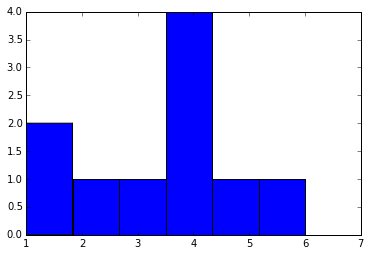

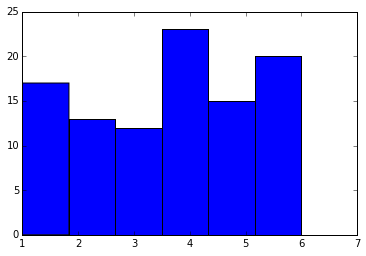

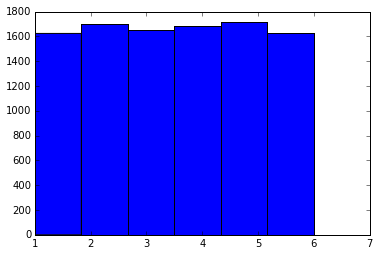

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# A function that returns the result of a die roll.
def roll():
    return random.randint(1, 6)

random.seed(1)
small_sample = [roll() for _ in range(10)]

# Plot a histogram with 6 bins (1 for each possible outcome of the die roll)
plt.hist(small_sample, 6)
plt.show()

random.seed(1)
medium_sample = [roll() for _ in range(100)]

plt.hist(medium_sample, 6)
plt.show()

random.seed(1)
large_sample = [roll() for _ in range(10000)]

plt.hist(large_sample, 6)
plt.show()

###5: Finding the right sample size

As you can see from the graphs above, the probability of rolling a 1 should be around .166. However, we only really noticed the probability reaching this value once we got to 10000 dice rolls. Generally, the lower your sample size, the more variability the probability will have around the "true" probability. 

We can graph out this variability by repeatedly rolling the die N times. So we could do 20 trials of rolling the die 10 times, and graph out all the resulting probabilities of rolling a 1. This would tell us how much error we could expect by rolling the die 20 times.

####Instructions

Set the random seed to 1, then generate probabilities for 300 trials of 100 die rolls each. Make a histogram with 20 bins.

Set the random seed to 1, then generate probabilities for 300 trials of 1000 die rolls each. Make a histogram with 20 bins.

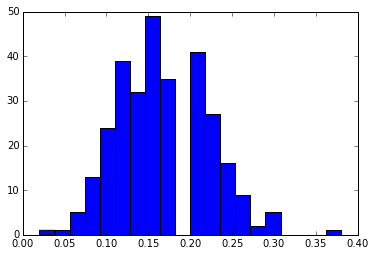

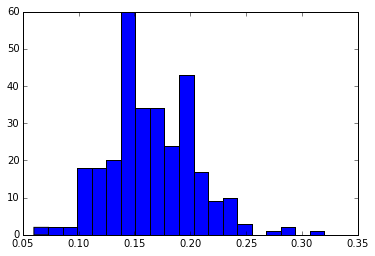

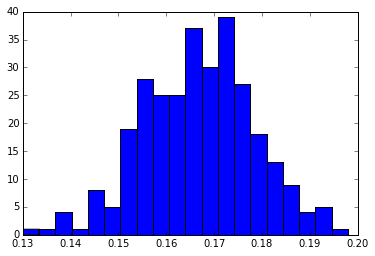

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """
    probabilities = []
    for i in range(num_trials):
        die_rolls = [roll() for _ in range(num_rolls)]
        one_prob = float(len([d for d in die_rolls if d==1])) / num_rolls
        probabilities.append(one_prob)
    return probabilities

random.seed(1)
small_sample = probability_of_one(300, 50)
plt.hist(small_sample, 20)
plt.show()

random.seed(1)
medium_sample = probability_of_one(300, 100)
plt.hist(medium_sample, 20)
plt.show()

random.seed(1)
large_sample = probability_of_one(300, 1000)
plt.hist(large_sample, 20)
plt.show()

###6: What are the odds?

See how the graphs in the last screen got "steeper" as we added more rolls? This is because the variability around the mean decreases as we have more samples in each trial.

One interesting thing that we can do given the distributions above is find the odds of getting a certain probability for rolling a one given the number of rolls we make.

So, if we do 100 rolls of the die, and get a .25 probability of rolling a 1, we could look up how many trials in our data above got that probability or above for one.

This lets us find how likely our result is.

####Instructions

Find how many standard deviations away from the mean of large_sample .18 is. Assign the result to deviations_from_mean.

Find how many probabilities in large sample are greater than or equal to .18. Assign the result to over_18_count.

In [8]:
import numpy

large_sample_std = numpy.std(large_sample)
avg = numpy.mean(large_sample)
deviations_from_mean = (.18 - avg) / large_sample_std

over_18_count = len([p for p in large_sample if p >= .18])
print("over_18_count:", over_18_count)

over_18_count: 38


###7: Sampling counties

Now, let's look at why random sampling is important instead of just picking any rows we want.

####Instructions

Use the select_random_sample function to pick 1000 random samples of 100 counties each from the income data. Find the mean of the median_income column for each sample.

Plot a histogram with 20 bins of all the mean median incomes.

mean_median_income: 32293.560909583106


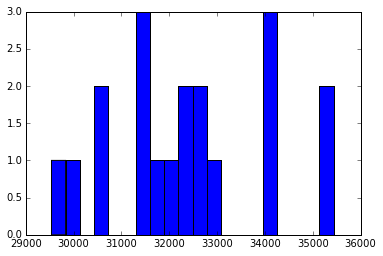

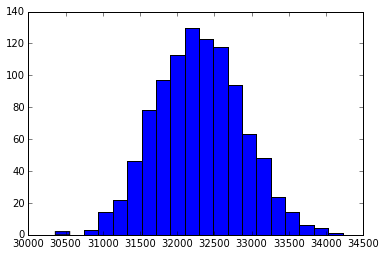

In [9]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# This is the mean median income in any US county.
mean_median_income = income["median_income"].mean()
print("mean_median_income:", mean_median_income)

def get_sample_mean(start, end):
    return income["median_income"][start:end].mean()

def find_mean_incomes(row_step):
    mean_median_sample_incomes = []
    # Iterate over the indices of the income rows
    # Starting at 0, and counting in blocks of row_step (0, row_step, row_step * 2, etc).
    for i in range(0, income.shape[0], row_step):
        # Find the mean median for the row_step counties from i to i+row_step.
        mean_median_sample_incomes.append(get_sample_mean(i, i+row_step))
    return mean_median_sample_incomes

nonrandom_sample = find_mean_incomes(100)
plt.hist(nonrandom_sample, 20)
plt.show()

# What you're seeing above is the result of biased sampling.
# Instead of selecting randomly, we selected counties that were next to each other in the data.
# This picked counties in the same state more often that not, and created means that didn't represent the whole country.
# This is the danger of not using random sampling -- you end up with samples that don't reflect the entire population.
# This gives you a distribution that isn't normal.

def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

random.seed(1)
random_sample = [select_random_sample(100)["median_income"].mean() for _ in range(1000)]
plt.hist(random_sample, 20)
plt.show()

###8: An experiment

Let's say we're the US governement (oh no!). We want to run an experiment to see if a certain kind of adult education can help high school graduates earn more relative to college graduates than they could otherwise.

We decide to trial our program in 100 counties, and measure the median incomes of both groups in 5 years.

At the end of 5 years, we first need to measure the whole population to determine the typical ratio between high school graduate earnings and college graduate earnings.

####Instructions

Set the random seed to 1. 

Pick 1000 random samples of 100 counties each from the income data. For each sample, divide the median_income_hs column by median_income_college to get ratios. Then find the mean of all the ratios in the sample. Add it to mean_ratios.

Plot a histogram with 20 bins of the mean_ratios list.

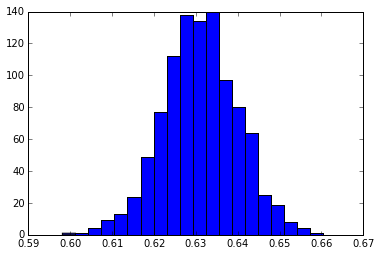

In [10]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

random.seed(1)
random.seed(1)
mean_ratios = []
for i in range(1000):
    sample = select_random_sample(100)
    ratios = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(ratios.mean())
    
plt.hist(mean_ratios, 20)
plt.show()

###9: Statistical significance

After 5 years, we determine that the mean ratio in our random sample of 100 counties is .675 -- that is, high school graduates on average earn 67.5% of what college graduates do.

Now that we have our result, how do we know if our hypothesis is correct? Remember, our hypothesis was about the whole population, not about the sample.

Statistical significance is used to determine if a result is valid for a population or not. You usually set a significance level beforehand that will determine if your hypothesis is true or not. After conducting the experiment, you check against the significance level to determine.

A common significance level is .05. This means: "only 5% or less of the time will your result have been due to chance".

In our case, chance could be that the high school graduates in the county changed income some way other than through our program -- maybe some higher paying factory jobs came to town, or there were some other educational initiatives around.

In order to test for significance, we compare our result ratio with the mean ratios we found in the last section.

####Instructions

Determine how many values in mean_ratios are greater than or equal to .675. Then divide by the total number of items in mean_ratios to get the significance level. Assign the result to significance_value.

In [11]:
significance_value = None
mean_higher = len([m for m in mean_ratios if m >= .675])
significance_value = mean_higher / len(mean_ratios)

###10: Final result

Our significance value was .014. Based on the entire population, only 1.4% of the time will the wage results we saw have occurred on their own. So our experiment exceeded our significance level (lower means more significant). Thus, our experiment showed that the program did improve the wages of high school graduates relative to college graduates.

You may have noticed earlier that the more samples in our trials, the "steeper" the histograms of outcomes get (look back on the probability of rolling one with the die if you need a refresher). This "steepness" arose because the more trials we have, the less likely the value is to vary from the "true" value.

This same principle applies to significance testing. You need a larger deviation from the mean to have something be "significant" if your sample size is smaller. The larger the trial, the smaller the deviation needs to be to get a significant result.

You may be asking at this point how we can determine statistical significance without knowing the population values upfront. In a lot of cases, like drug trials, you don't have the capability to measure everyone in the world to compare against your sample. Statistics gives us tools to deal with this.

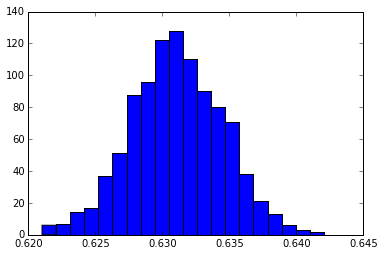

In [12]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# This is "steeper" than the graph from before, because it has 500 items in each sample.
random.seed(1)
mean_ratios = []
for i in range(1000):
    sample = select_random_sample(500)
    ratios = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(ratios.mean())
    
plt.hist(mean_ratios, 20)
plt.show()